In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from utils import load_data, process_graph_data
from utils import package_mxl, adj_rw_norm
from utils import sparse_mx_to_torch_sparse_tensor
from utils import ResultRecorder

from model import GCN, GCNBias, SGC, ResGCN, GCNII, APPNP
from layers import GraphConv
from load_semigcn_data import load_data_gcn
from data_loader import DataLoader

from sklearn.metrics import f1_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.sparse.csgraph import connected_components

from tqdm import trange
import numpy as np
import copy 
import time
import pickle
import os

DATASET = 'cora'
SAVE_DIR = './exp_results/figures/%s/'%DATASET

layer = 10
repeat = 0

save_path = os.path.join('exp_results/%s/'%DATASET, 
                         'results_%s_L%d_repteat%d.pkl'%(DATASET, layer, repeat))
with open(save_path, 'rb') as f:
    results_list = pickle.load(f)

In [2]:
result = results_list[1]

dM_before = []
dM_after = []
w_sigval_before = []
w_sigval_after = []

for repeat in range(10):
    save_path = os.path.join('exp_results/%s/'%DATASET, 
                         'results_%s_L%d_repteat%d.pkl'%(DATASET, layer, repeat))
    with open(save_path, 'rb') as f:
        results_list = pickle.load(f)
        
    result = results_list[1]
    dM_before.append(result.dM_before)
    dM_after.append(result.dM_after)
    w_sigval_before.append(list(result.w_sigval_before.values()))
    w_sigval_after.append(list(result.w_sigval_after.values()))

In [5]:
fig, axs = plt.subplots()
color_1 = next(axs._get_lines.prop_cycler)['color']
color_2 = next(axs._get_lines.prop_cycler)['color']
plt.close()

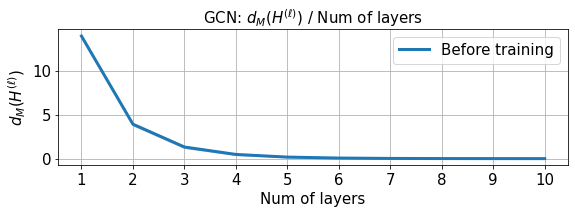

In [6]:
ALGORITHM = 'GCN'
start_layer = 1
y_vals = dM_before

fig, axs = plt.subplots(figsize=(8, 3))

###
y_mean = np.mean(y_vals, axis=0)[start_layer:]
y_stds = np.std(y_vals, axis=0)[start_layer:]
x_vals = np.arange(len(y_mean))+1

axs.plot(x_vals, y_mean, label='Before training', linewidth=3, color=color_1)
axs.fill_between(x_vals, y_mean-y_stds, y_mean+y_stds ,alpha=0.3, color=color_1)
###

plt.title('%s: $d_M(H^{(\ell)})$ / Num of layers'%ALGORITHM, fontsize=15)
axs.set_xlabel('Num of layers', fontsize=15)
axs.set_ylabel('$d_M(H^{(\ell)})$', fontsize=15)
axs.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
fig.tight_layout()
plt.legend(fontsize=15)

for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in axs.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
plt.savefig('figure3_a.pdf')

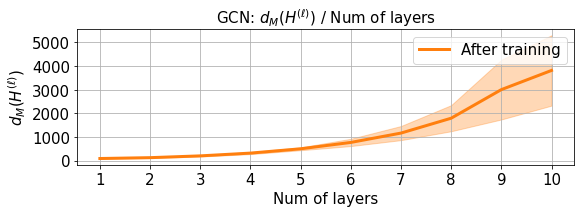

In [7]:
ALGORITHM = 'GCN'
start_layer = 1
y_vals = dM_after

fig, axs = plt.subplots(figsize=(8, 3))

###
y_mean = np.mean(y_vals, axis=0)[start_layer:]
y_stds = np.std(y_vals, axis=0)[start_layer:]
x_vals = np.arange(len(y_mean))+1

axs.plot(x_vals, y_mean, label='After training', linewidth=3, color=color_2)
axs.fill_between(x_vals, y_mean-y_stds, y_mean+y_stds ,alpha=0.3, color=color_2)
###

plt.title('%s: $d_M(H^{(\ell)})$ / Num of layers'%ALGORITHM, fontsize=15)
axs.set_xlabel('Num of layers', fontsize=15)
axs.set_ylabel('$d_M(H^{(\ell)})$', fontsize=15)
axs.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
fig.tight_layout()
plt.legend(fontsize=15)

for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in axs.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
plt.savefig('figure3_b.pdf')

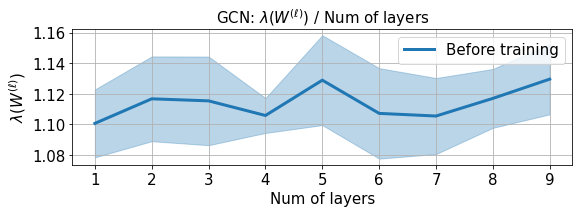

In [8]:
ALGORITHM = 'GCN'
start_layer = 1
y_vals = w_sigval_before

fig, axs = plt.subplots(figsize=(8, 3))

###
y_mean = np.mean(y_vals, axis=0)[start_layer:]
y_stds = np.std(y_vals, axis=0)[start_layer:]
x_vals = np.arange(len(y_mean))+1

axs.plot(x_vals, y_mean, label='Before training', linewidth=3, color=color_1)
axs.fill_between(x_vals, y_mean-y_stds, y_mean+y_stds ,alpha=0.3, color=color_1)
###

plt.title('%s: $\lambda(W^{(\ell)})$ / Num of layers'%ALGORITHM, fontsize=15)
axs.set_xlabel('Num of layers', fontsize=15)
axs.set_ylabel('$\lambda(W^{(\ell)})$', fontsize=15)
axs.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
fig.tight_layout()
plt.legend(fontsize=15)

for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in axs.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
plt.savefig('figure3_c.pdf')

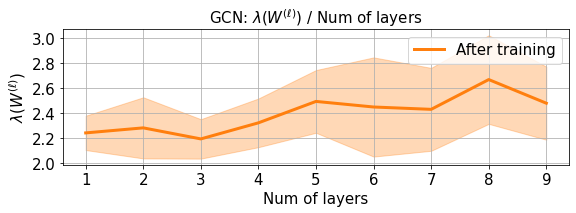

In [9]:
ALGORITHM = 'GCN'
start_layer = 1
y_vals = w_sigval_after

fig, axs = plt.subplots(figsize=(8, 3))

###
y_mean = np.mean(y_vals, axis=0)[start_layer:]
y_stds = np.std(y_vals, axis=0)[start_layer:]
x_vals = np.arange(len(y_mean))+1

axs.plot(x_vals, y_mean, label='After training', linewidth=3, color=color_2)
axs.fill_between(x_vals, y_mean-y_stds, y_mean+y_stds ,alpha=0.3, color=color_2)
###

plt.title('%s: $\lambda(W^{(\ell)})$ / Num of layers'%ALGORITHM, fontsize=15)
axs.set_xlabel('Num of layers', fontsize=15)
axs.set_ylabel('$\lambda(W^{(\ell)})$', fontsize=15)
axs.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
fig.tight_layout()
plt.legend(fontsize=15)

for tick in axs.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in axs.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
plt.savefig('figure3_d.pdf')

In [ ]:
for i in range(10):
    print(2.5**i)